In [1]:
import os

In [2]:
data_dir = 'D:\\mini project\\dataset\\Grape'

In [3]:
os.listdir(data_dir)

['grape']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
from matplotlib.image import imread

In [6]:
grape = data_dir + '\\grape\\'


In [7]:
os.listdir(grape)

['black_rot', 'grape_esca', 'grape_healthy', 'grape_leaf_blight']

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
directory_root = 'D:\\mini project\\dataset\\Grape'

In [10]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = os.listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = os.listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(imread(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing black_rot ...
[INFO] Processing grape_esca ...
[INFO] Processing grape_healthy ...
[INFO] Processing grape_leaf_blight ...
[INFO] Image loading completed


In [11]:
len(image_list)

4062

In [12]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

In [13]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl','wb'))
n_classes = len(label_binarizer.classes_)

In [14]:
print(label_binarizer.classes_)

['black_rot' 'grape_esca' 'grape_healthy' 'grape_leaf_blight']


In [15]:
np_image_list = np.array(image_list,dtype = np.float16)/255
np_image_list.shape

(4062, 256, 256, 3)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.33, random_state=101)

In [17]:
image_gen = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
                               zoom_range=0.1,
                               fill_mode='nearest',
                               horizontal_flip=True,
                               rotation_range=25,
                               shear_range=0.2
                              )

In [18]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm

In [19]:
IMAGE_SIZE = [256,256]

In [20]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [22]:
x = Flatten()(resnet152V2.output)

In [23]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

conv4_block25_2_pad (ZeroPaddin (None, 18, 18, 256)  0           conv4_block25_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block25_2_conv (Conv2D)   (None, 16, 16, 256)  589824      conv4_block25_2_pad[0][0]        
__________________________________________________________________________________________________
conv4_block25_2_bn (BatchNormal (None, 16, 16, 256)  1024        conv4_block25_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block25_2_relu (Activatio (None, 16, 16, 256)  0           conv4_block25_2_bn[0][0]         
__________________________________________________________________________________________________
conv4_block25_3_conv (Conv2D)   (None, 16, 16, 1024) 263168      conv4_block25_2_relu[0][0]       
__________________________________________________________________________________________________
conv4_bloc

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [25]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [29]:
r = model.fit_generator(
  image_gen.flow(X_train,y_train),
  validation_data=(X_test,y_test),
  epochs=20,
    callbacks=[early_stop])

Epoch 1/20
86/86 [==============================] - 576s 7s/step - loss: 0.6681 - accuracy: 0.9530 - val_loss: 0.3092 - val_accuracy: 0.9799
Epoch 2/20
86/86 [==============================] - 593s 7s/step - loss: 0.4741 - accuracy: 0.9680 - val_loss: 1.0912 - val_accuracy: 0.9441
Epoch 3/20
86/86 [==============================] - 599s 7s/step - loss: 0.5346 - accuracy: 0.9651 - val_loss: 1.0680 - val_accuracy: 0.9441
Epoch 4/20
86/86 [==============================] - 586s 7s/step - loss: 0.5348 - accuracy: 0.9644 - val_loss: 0.3010 - val_accuracy: 0.9814
Epoch 5/20
86/86 [==============================] - 585s 7s/step - loss: 0.3939 - accuracy: 0.9746 - val_loss: 0.2589 - val_accuracy: 0.9843
Epoch 6/20
86/86 [==============================] - 587s 7s/step - loss: 0.4250 - accuracy: 0.9743 - val_loss: 0.3278 - val_accuracy: 0.9799
Epoch 7/20
86/86 [==============================] - 581s 7s/step - loss: 0.7005 - accuracy: 0.9655 - val_loss: 0.3446 - val_accuracy: 0.9776
Epoch 8/20
86

In [30]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

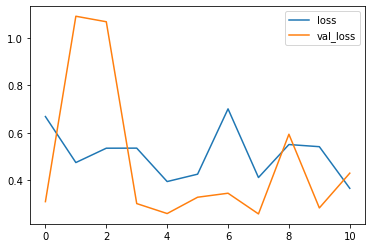

In [31]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

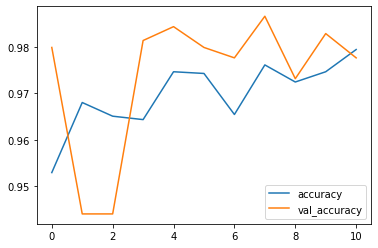

In [32]:
metrics[['accuracy','val_accuracy']].plot()

In [33]:
model.evaluate(X_test,y_test)

42/42 [==============================] - 199s 5s/step - loss: 0.4293 - accuracy: 0.9776


[0.4292832911014557, 0.9776286482810974]

In [34]:
pred = model.predict(X_test)
pred

array([[9.783445e-06, 9.999902e-01, 8.591611e-28, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00]],
      dtype=float32)

In [35]:
from tensorflow.keras.models import load_model

model.save('model_miniproject_resnet152V2.h5')

C:\Users\Mudit\anaconda_3.1\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [36]:
from matplotlib.image import imread
import numpy as np

In [37]:
newm = load_model('model_miniproject_resnet152V2.h5')

In [38]:
os.listdir('D:\\mini project\\dataset\\Grape\\grape\\grape_esca')

['0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG',
 '00b65fe8-cee1-4b68-8ef4-1211814f2845___FAM_B.Msls 3990.JPG',
 '00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197.JPG',
 '01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153.JPG',
 '011bb69d-fb9c-4fb9-b8cc-031e91270ec2___FAM_B.Msls 4288.JPG',
 '011f307f-e06b-4604-9419-d940f7b00290___FAM_B.Msls 1096.JPG',
 '019afd88-6645-44c4-a5d2-bd583b877a50___FAM_B.Msls 1744.JPG',
 '01c74b8d-1113-47c0-86a3-6ceea27853c0___FAM_B.Msls 4113.JPG',
 '02223cc6-30d2-408d-a091-65257d044a50___FAM_B.Msls 0908.JPG',
 '023df989-ab4c-4f66-a6c8-a41c1142ab7d___FAM_B.Msls 1834.JPG',
 '025a9fa7-827a-43c3-a82f-66d9cbfb2055___FAM_B.Msls 4282.JPG',
 '0279ec2c-5470-47e8-b1ba-79442bd323bb___FAM_B.Msls 4396.JPG',
 '02af0429-46c1-444b-bf62-a4d0198141e8___FAM_B.Msls 1062.JPG',
 '0336e894-5963-4a7e-9b56-e802473ae4c5___FAM_B.Msls 1231.JPG',
 '037b6ea5-3d81-4489-b7a3-1116ee2cc6e1___FAM_B.Msls 0944.JPG',
 '03c1559d-52a2-455f-b682-5c3d266b05b7___FAM_B.Msls 381

In [39]:
image_dir = "D:\\mini project\\dataset\\Grape\\grape\\grape_esca\\011bb69d-fb9c-4fb9-b8cc-031e91270ec2___FAM_B.Msls 4288.JPG"

im =imread(image_dir)

np_image_li = np.array(im,dtype = np.float16)/255
npp_image = np.expand_dims(np_image_li, axis=0)

In [40]:
result = newm.predict(npp_image)
print(result)

[[0. 1. 0. 0.]]


In [41]:
itemindex = np.where(result==np.max(result))
print('probablity:'+str(np.max(result))+'\n'+label_binarizer.classes_[itemindex[1][0]])

probablity:1.0
grape_esca
